# HKU QIDS 2023 Quantitative Investment Competition: ARIMA

## Init Config

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.compat import lzip 
from statsmodels.stats.diagnostic import het_breuschpagan
from numpy import mean
from numpy import std
from numpy import absolute
from scipy.stats import shapiro
import seaborn as sns
import warnings
import os
from qids_package.qids import *
from submit import submit
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [4]:
seed = 257248
stock_num = 54
day_num_total = 1000
day_num = 1000 - 2
test_day_num = 700
timeslot_num = 50

## Load Data

In [125]:
write_path = "../data/"

train_path = write_path + "train.csv"
test_path = write_path + "test.csv"
real_return_path = write_path + "real_return.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
real_return = pd.read_csv(real_return_path)

In [126]:
train_y = train["return"]
train = train["day"]
test = test["day"]
real_y = real_return["return"]

## ARIMA

In [127]:
stock = 2
start = stock * day_num
train_y_per_stock = train_y[start:start+day_num].reset_index(drop=True)

In [128]:
start = stock * (test_day_num - 2)
real_y_per_stock = real_y[start:(start+test_day_num-2)].reset_index(drop=True)

### ADF test

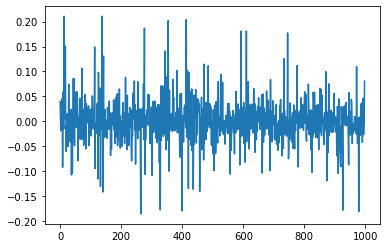

In [129]:
plt.plot(train_y_per_stock);

ADF test on raw data
ADF Statistic: -23.960435908041887
p-value: 0.0
Critical Values:
1%: -3.4369325637409154
5%: -2.8644462162311934
10%: -2.568317409920808


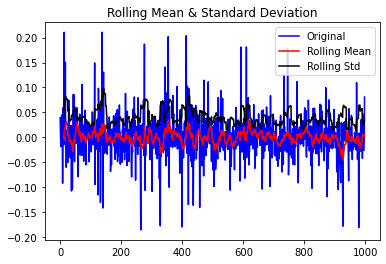

In [130]:
# load the time series data into a pandas DataFrame
# define the function to perform the ADF test
def adf_test(timeseries, verbose=1):
    """
    Perform Augmented Dickey-Fuller test on a time series
    """
    # calculate rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # perform the ADF test
    adf_result = adfuller(timeseries, autolag='AIC')
    if verbose:
        print(f'ADF Statistic: {adf_result[0]}')
        print(f'p-value: {adf_result[1]}')
        print('Critical Values:')
        for key, value in adf_result[4].items():
            print(f'{key}: {value}')

    # plot the rolling statistics
    if verbose:
        plt.plot(timeseries, color='blue', label='Original')
        plt.plot(rolmean, color='red', label='Rolling Mean')
        plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show()

# call the function to perform the ADF test on the time series data
print(f"ADF test on raw data")
adf_test(train_y_per_stock)
# print(f"\nADF test on data after log transformation")
# adf_test(np.log(train_y))
# print(f"\nADF test on data after log transformation and differencing")
# adf_test(np.log(train_y).diff().dropna())


### ACF and PACF plots


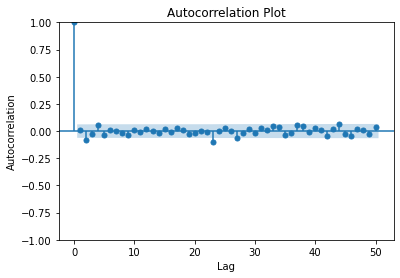

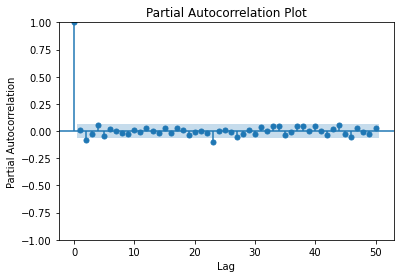

In [131]:
data = train_y_per_stock

# Plot the autocorrelation using statsmodels
fig, ax = plt.subplots(figsize=(6, 4))
plot_acf(data, lags=50, ax=ax)
ax.set_title('Autocorrelation Plot')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
plot_pacf(data, lags=50, ax=ax)
ax.set_title('Partial Autocorrelation Plot')
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
plt.show()

### Try different ARIMA models

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(3, 0, 3)   Log Likelihood                1726.942
Date:                Tue, 07 Mar 2023   AIC                          -3437.884
Time:                        19:14:20   BIC                          -3398.638
Sample:                             0   HQIC                         -3422.966
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.161      0.872      -0.002       0.003
ar.L1         -0.9683      0.324     -2.990      0.003      -1.603      -0.333
ar.L2         -0.5261      0.418     -1.259      0.2

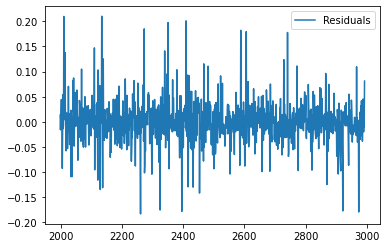

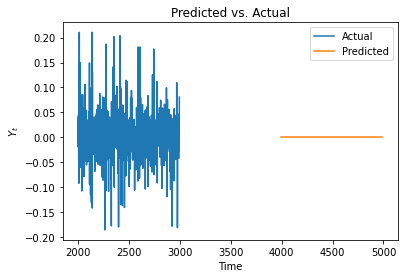

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(3, 0, 4)   Log Likelihood                1726.902
Date:                Tue, 07 Mar 2023   AIC                          -3435.804
Time:                        19:14:22   BIC                          -3391.652
Sample:                             0   HQIC                         -3419.021
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.190      0.849      -0.002       0.003
ar.L1          0.0950      1.124      0.085      0.933      -2.107       2.297
ar.L2          0.2296      0.921      0.249      0.8

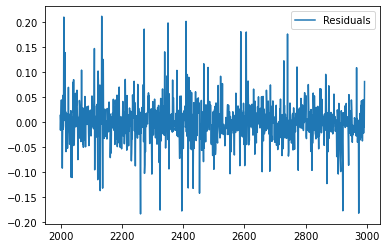

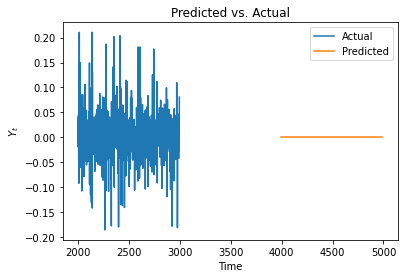

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(3, 0, 5)   Log Likelihood                1726.799
Date:                Tue, 07 Mar 2023   AIC                          -3433.598
Time:                        19:14:23   BIC                          -3384.541
Sample:                             0   HQIC                         -3414.951
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.156      0.876      -0.002       0.003
ar.L1         -0.0495      4.011     -0.012      0.990      -7.911       7.812
ar.L2          0.0313      2.419      0.013      0.9

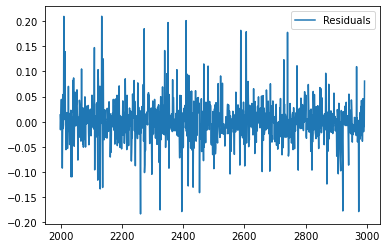

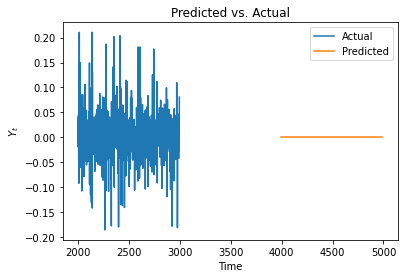

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(3, 0, 6)   Log Likelihood                1726.850
Date:                Tue, 07 Mar 2023   AIC                          -3431.700
Time:                        19:14:24   BIC                          -3377.736
Sample:                             0   HQIC                         -3411.188
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.157      0.875      -0.002       0.003
ar.L1         -0.2666     30.642     -0.009      0.993     -60.324      59.791
ar.L2         -0.1529     14.453     -0.011      0.9

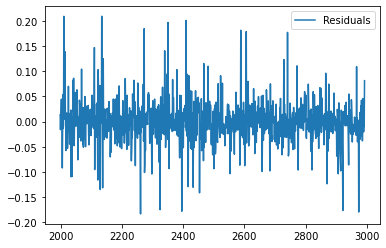

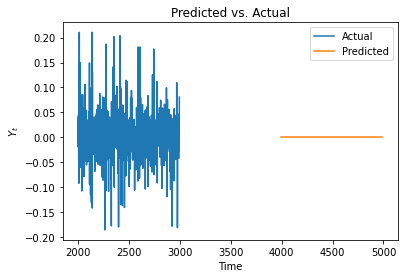

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(3, 0, 7)   Log Likelihood                1726.885
Date:                Tue, 07 Mar 2023   AIC                          -3429.770
Time:                        19:14:25   BIC                          -3370.901
Sample:                             0   HQIC                         -3407.394
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.155      0.877      -0.002       0.003
ar.L1         -0.2667      6.969     -0.038      0.969     -13.925      13.392
ar.L2         -0.1565      3.438     -0.046      0.9

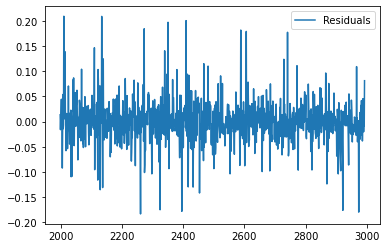

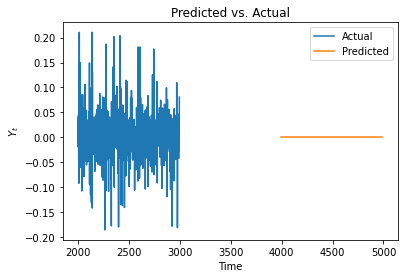

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(4, 0, 3)   Log Likelihood                1726.800
Date:                Tue, 07 Mar 2023   AIC                          -3435.601
Time:                        19:14:27   BIC                          -3391.449
Sample:                             0   HQIC                         -3418.819
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.145      0.885      -0.002       0.003
ar.L1         -0.1868      2.618     -0.071      0.943      -5.317       4.943
ar.L2          0.1510      2.423      0.062      0.9

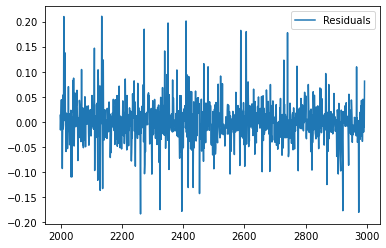

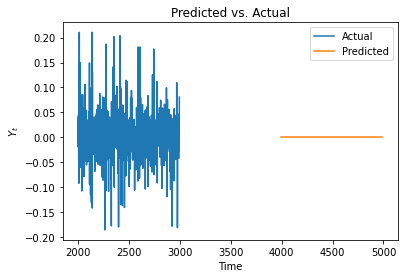

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(4, 0, 4)   Log Likelihood                1726.588
Date:                Tue, 07 Mar 2023   AIC                          -3433.177
Time:                        19:14:28   BIC                          -3384.119
Sample:                             0   HQIC                         -3414.530
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.268      0.789      -0.002       0.003
ar.L1         -0.0854      1.264     -0.068      0.946      -2.562       2.391
ar.L2          0.0791      1.152      0.069      0.9

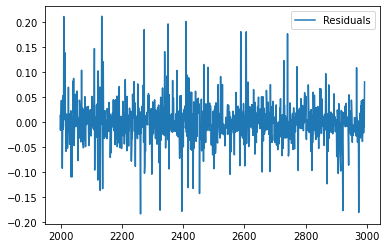

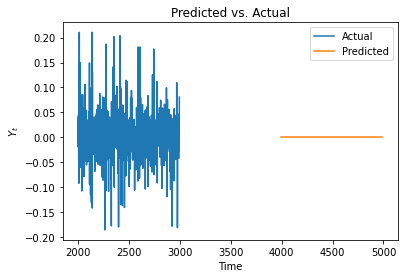

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(4, 0, 5)   Log Likelihood                1726.751
Date:                Tue, 07 Mar 2023   AIC                          -3431.502
Time:                        19:14:29   BIC                          -3377.539
Sample:                             0   HQIC                         -3410.990
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.160      0.873      -0.002       0.003
ar.L1         -0.0158      7.101     -0.002      0.998     -13.933      13.902
ar.L2         -0.0475      4.278     -0.011      0.9

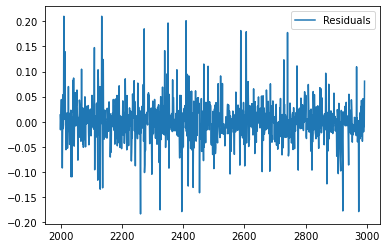

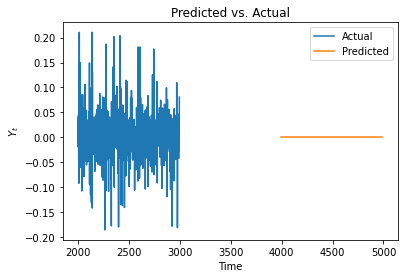

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(4, 0, 6)   Log Likelihood                1727.235
Date:                Tue, 07 Mar 2023   AIC                          -3430.469
Time:                        19:14:32   BIC                          -3371.600
Sample:                             0   HQIC                         -3408.093
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.692      0.489      -0.002       0.003
ar.L1         -0.2002      0.562     -0.356      0.722      -1.303       0.902
ar.L2         -0.1247      0.628     -0.199      0.8

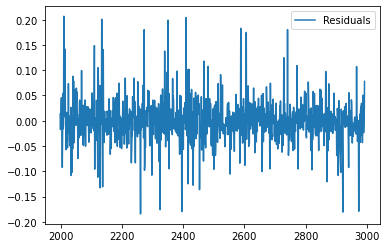

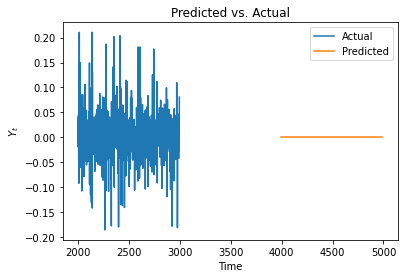

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(4, 0, 7)   Log Likelihood                1726.964
Date:                Tue, 07 Mar 2023   AIC                          -3427.927
Time:                        19:14:34   BIC                          -3364.152
Sample:                             0   HQIC                         -3403.686
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.130      0.897      -0.002       0.003
ar.L1         -0.2528      2.213     -0.114      0.909      -4.590       4.084
ar.L2         -0.1567      1.488     -0.105      0.9

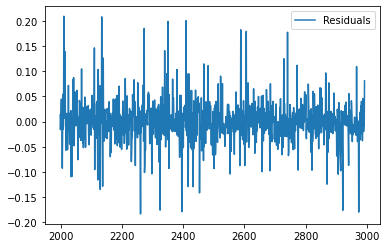

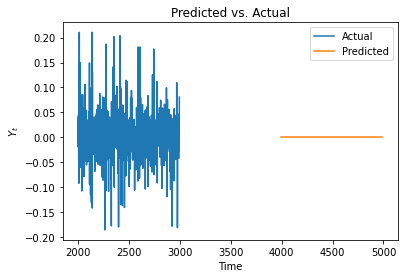

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(5, 0, 3)   Log Likelihood                1726.781
Date:                Tue, 07 Mar 2023   AIC                          -3433.562
Time:                        19:14:36   BIC                          -3384.504
Sample:                             0   HQIC                         -3414.915
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.157      0.876      -0.002       0.003
ar.L1          0.0083      1.602      0.005      0.996      -3.131       3.148
ar.L2         -0.0376      1.245     -0.030      0.9

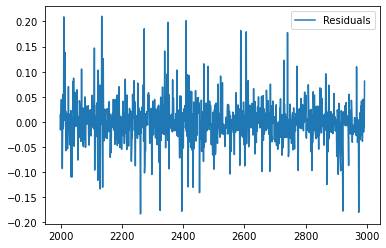

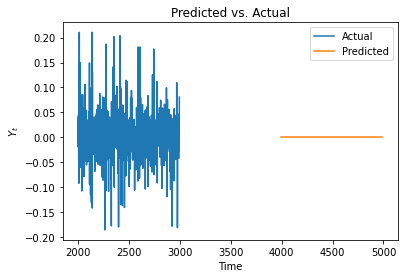

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(5, 0, 4)   Log Likelihood                1726.878
Date:                Tue, 07 Mar 2023   AIC                          -3431.756
Time:                        19:14:37   BIC                          -3377.793
Sample:                             0   HQIC                         -3411.244
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.157      0.875      -0.002       0.003
ar.L1         -0.0243      4.396     -0.006      0.996      -8.640       8.592
ar.L2          0.0155      3.665      0.004      0.9

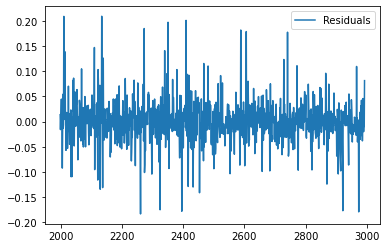

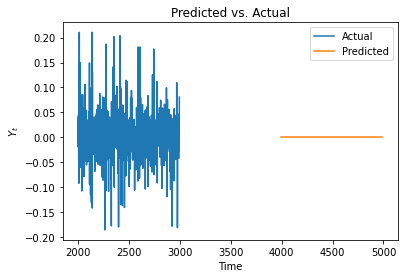

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1727.018
Date:                Tue, 07 Mar 2023   AIC                          -3430.036
Time:                        19:14:40   BIC                          -3371.166
Sample:                             0   HQIC                         -3407.659
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.154      0.878      -0.002       0.003
ar.L1          0.1406      1.806      0.078      0.938      -3.400       3.681
ar.L2         -0.0506      1.230     -0.041      0.9

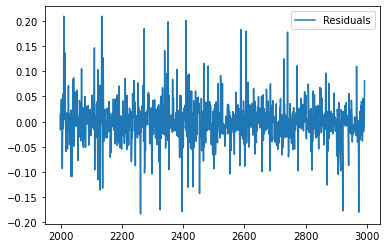

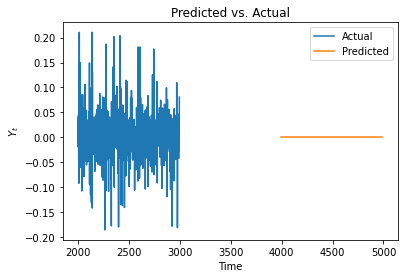

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(5, 0, 6)   Log Likelihood                1727.108
Date:                Tue, 07 Mar 2023   AIC                          -3428.216
Time:                        19:14:42   BIC                          -3364.441
Sample:                             0   HQIC                         -3403.975
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.152      0.879      -0.002       0.003
ar.L1         -0.2720      1.983     -0.137      0.891      -4.158       3.614
ar.L2         -0.1512      2.041     -0.074      0.9

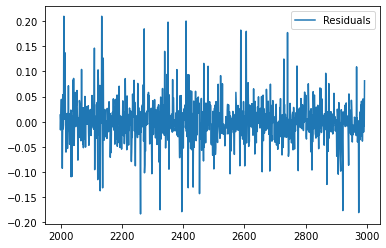

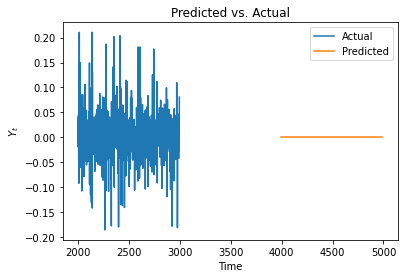

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(5, 0, 7)   Log Likelihood                1727.290
Date:                Tue, 07 Mar 2023   AIC                          -3426.580
Time:                        19:14:44   BIC                          -3357.899
Sample:                             0   HQIC                         -3400.474
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.169      0.866      -0.002       0.003
ar.L1         -0.3471      2.072     -0.167      0.867      -4.409       3.715
ar.L2         -0.2515      1.994     -0.126      0.9

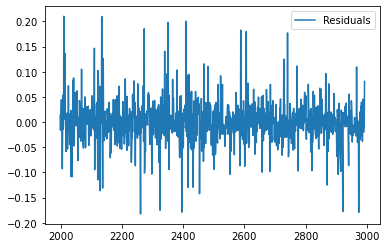

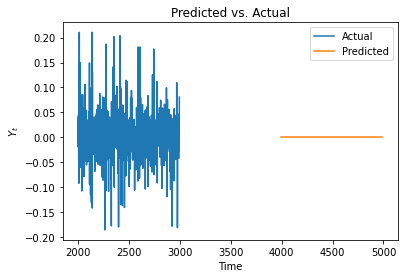

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(6, 0, 3)   Log Likelihood                1726.984
Date:                Tue, 07 Mar 2023   AIC                          -3431.968
Time:                        19:14:46   BIC                          -3378.005
Sample:                             0   HQIC                         -3411.456
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.156      0.876      -0.002       0.003
ar.L1          0.0094      4.523      0.002      0.998      -8.855       8.874
ar.L2         -0.0391      3.732     -0.010      0.9

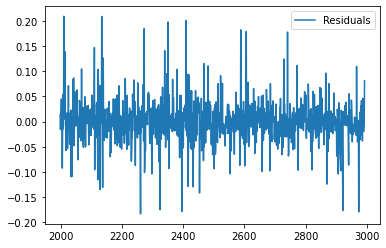

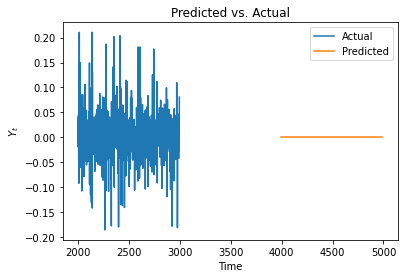

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(6, 0, 4)   Log Likelihood                1726.974
Date:                Tue, 07 Mar 2023   AIC                          -3429.949
Time:                        19:14:48   BIC                          -3371.080
Sample:                             0   HQIC                         -3407.572
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.155      0.877      -0.002       0.003
ar.L1          0.9104      1.440      0.632      0.527      -1.912       3.732
ar.L2         -0.0401      1.145     -0.035      0.9

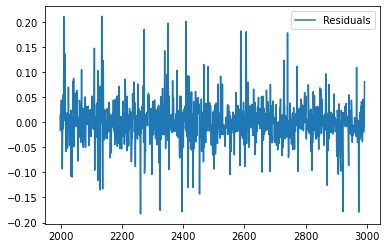

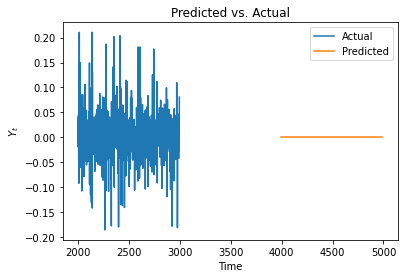

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(6, 0, 5)   Log Likelihood                1727.012
Date:                Tue, 07 Mar 2023   AIC                          -3428.025
Time:                        19:14:50   BIC                          -3364.250
Sample:                             0   HQIC                         -3403.783
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.154      0.878      -0.002       0.003
ar.L1          0.1790      2.292      0.078      0.938      -4.313       4.671
ar.L2         -0.0896      2.042     -0.044      0.9

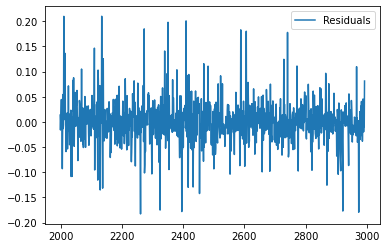

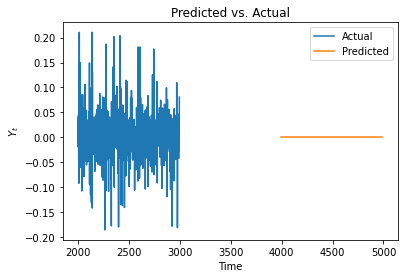

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(6, 0, 6)   Log Likelihood                1727.485
Date:                Tue, 07 Mar 2023   AIC                          -3426.970
Time:                        19:14:52   BIC                          -3358.289
Sample:                             0   HQIC                         -3400.864
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.133      0.894      -0.002       0.003
ar.L1          0.1101      0.895      0.123      0.902      -1.644       1.864
ar.L2         -0.1598      0.974     -0.164      0.8

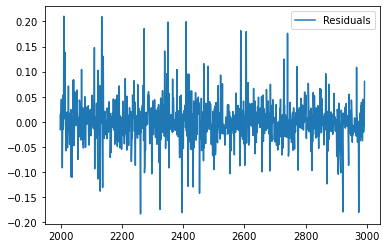

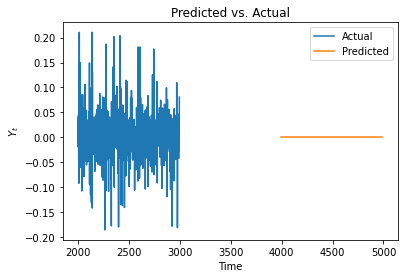

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(6, 0, 7)   Log Likelihood                1727.486
Date:                Tue, 07 Mar 2023   AIC                          -3424.972
Time:                        19:14:55   BIC                          -3351.386
Sample:                             0   HQIC                         -3397.002
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.159      0.873      -0.002       0.003
ar.L1         -0.1021      1.664     -0.061      0.951      -3.364       3.160
ar.L2         -0.0578      2.037     -0.028      0.9

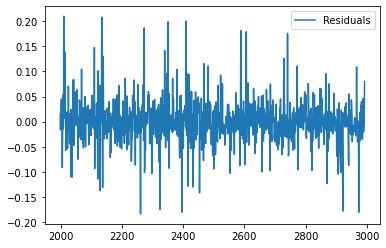

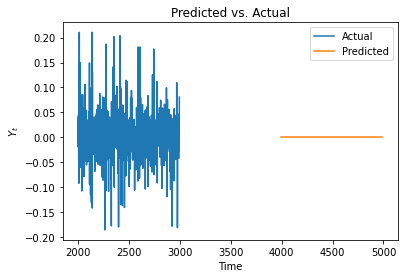

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(7, 0, 3)   Log Likelihood                1726.986
Date:                Tue, 07 Mar 2023   AIC                          -3429.972
Time:                        19:14:56   BIC                          -3371.103
Sample:                             0   HQIC                         -3407.595
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.156      0.876      -0.002       0.003
ar.L1          0.0094    180.438   5.22e-05      1.000    -353.643     353.661
ar.L2         -0.0392     24.007     -0.002      0.9

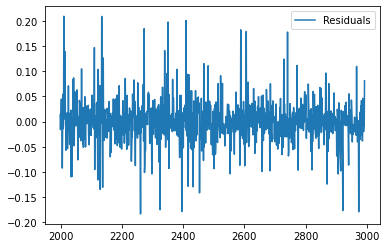

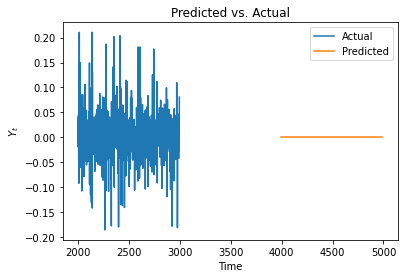

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(7, 0, 4)   Log Likelihood                1726.970
Date:                Tue, 07 Mar 2023   AIC                          -3427.941
Time:                        19:14:58   BIC                          -3364.166
Sample:                             0   HQIC                         -3403.700
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.156      0.876      -0.002       0.003
ar.L1          0.0088    149.498   5.87e-05      1.000    -293.001     293.019
ar.L2         -0.0376     28.003     -0.001      0.9

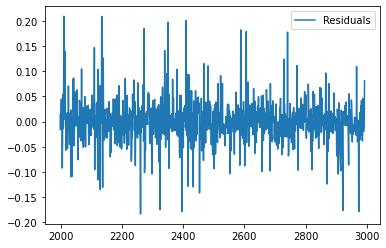

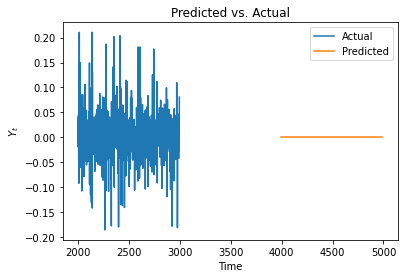

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(7, 0, 5)   Log Likelihood                1727.347
Date:                Tue, 07 Mar 2023   AIC                          -3426.694
Time:                        19:15:00   BIC                          -3358.013
Sample:                             0   HQIC                         -3400.588
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.151      0.880      -0.002       0.003
ar.L1          0.4368      1.768      0.247      0.805      -3.028       3.901
ar.L2         -0.2298      1.334     -0.172      0.8

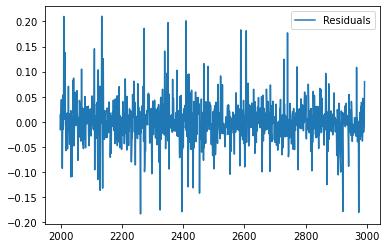

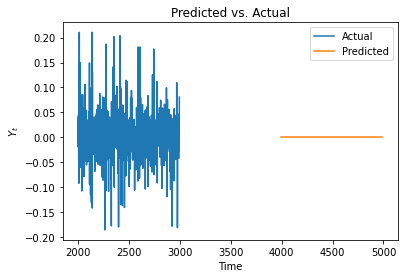

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(7, 0, 6)   Log Likelihood                1727.571
Date:                Tue, 07 Mar 2023   AIC                          -3425.142
Time:                        19:15:03   BIC                          -3351.555
Sample:                             0   HQIC                         -3397.171
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.151      0.880      -0.002       0.003
ar.L1          0.1056      1.300      0.081      0.935      -2.442       2.653
ar.L2         -0.1102      1.078     -0.102      0.9

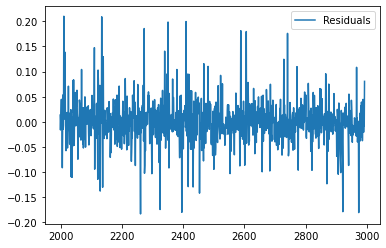

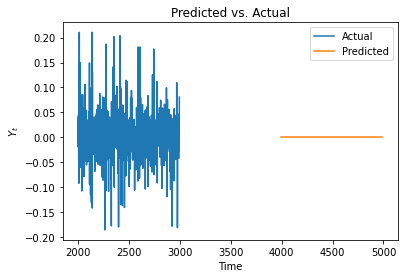

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(7, 0, 7)   Log Likelihood                1727.454
Date:                Tue, 07 Mar 2023   AIC                          -3422.909
Time:                        19:15:06   BIC                          -3344.417
Sample:                             0   HQIC                         -3393.073
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.156      0.876      -0.002       0.003
ar.L1         -0.4598      1.176     -0.391      0.696      -2.765       1.846
ar.L2          0.1392      1.168      0.119      0.9

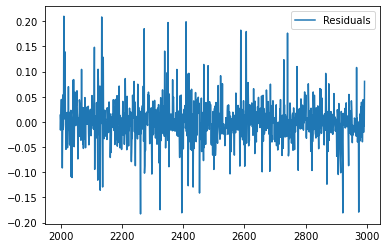

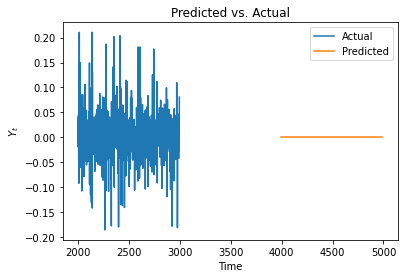

In [123]:
data = train_y_per_stock

# fit an ARIMA model to the time series data
p_list = range(3, 8)
q_list = range(3, 8)
d_list = [0]

for p in p_list:
    for d in d_list:
        for q in q_list:

            model = ARIMA(data, order=(p,d,q))
            results = model.fit()

            # Test for Heteroskedasticity (included in fit summary)
            # print(results.test_heteroskedasticity(None))

            # print a summary of the model results
            print(results.summary())

            # plot the residuals of the model
            residuals = pd.Series(results.resid, name='Residuals')
            residuals[1:,].plot()
            plt.legend()
            plt.show()

            # plot the actual values of the time series data compared to the predicted values from the model
            fig, ax = plt.subplots(figsize=(6,4))
            ax.plot(data, label='Actual')
            ax.plot(results.predict(start=data.index[0], end=data.index[-1])[1:,], label='Predicted')
            ax.legend(loc='upper right')
            plt.xlabel('Time')
            plt.ylabel(r'$Y_t$')
            plt.title('Predicted vs. Actual')
            plt.show()


### ARIMA(1,1,2): best AIC and BIC scores


#### Model fitting

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  998
Model:                 ARIMA(7, 0, 1)   Log Likelihood                1775.682
Date:                Tue, 07 Mar 2023   AIC                          -3531.365
Time:                        17:46:57   BIC                          -3482.307
Sample:                             0   HQIC                         -3512.717
                                - 998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.213      0.831      -0.002       0.003
ar.L1          0.0350      0.675      0.052      0.959      -1.288       1.358
ar.L2         -0.0072      0.062     -0.117      0.9

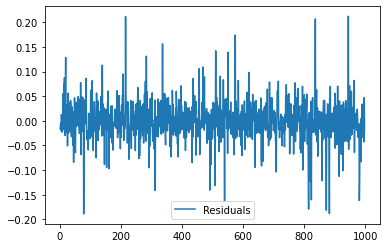

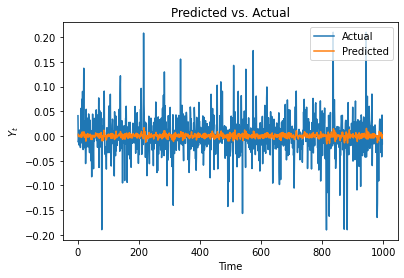

In [105]:
data = train_y_per_stock

# fit an ARIMA model to the time series data
model = ARIMA(data, order=(7,0,1))
results = model.fit()

# Test for Heteroskedasticity (included in fit summary)
# print(results.test_heteroskedasticity(None))

# print a summary of the model results
print(results.summary())

# plot the residuals of the model
residuals = pd.Series(results.resid, name='Residuals')
residuals[1:,].plot()
plt.legend()
plt.show()

# plot the actual values of the time series data compared to the predicted values from the model
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(data, label='Actual')
ax.plot(results.predict(start=data.index[0], end=data.index[-1])[1:,], label='Predicted')
ax.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel(r'$Y_t$')
plt.title('Predicted vs. Actual')
plt.show()


#### Residual Analysis


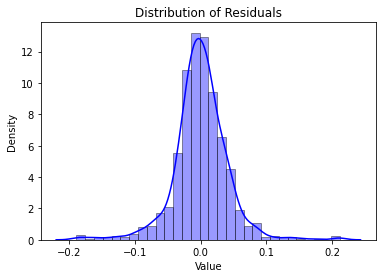

[[[1.0000e-04 2.9000e-03 5.6000e-03 1.2900e-02 1.7800e-02 1.8300e-02
   2.2600e-02 9.0500e-02 1.2164e+00 1.8454e+00]
  [       nan        nan        nan        nan        nan        nan
          nan        nan        nan 1.7430e-01]]]
Shapiro-Wilk statistic = 0.9307442307472229; p-value = 4.5868497825450846e-21


In [106]:
residuals = residuals[1:, ]
# Residual distribution plot
sns.distplot(residuals, hist=True, kde=True, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Distribution of Residuals')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
print(np.round(results.test_serial_correlation("ljungbox", 10), 4))
# Apply Shapiro-Wilk test for normality
sw = shapiro(residuals)
print(f"Shapiro-Wilk statistic = {sw[0]}; p-value = {sw[1]}")

#### Model forecast

In [107]:
# forecast summary
# step = [0, 4, 9, 29, 59]
obj = results.get_forecast(steps=700)
obj_sum = obj.summary_frame()
# np.round(obj_sum.iloc[step, :], 4)
# prediction summary
pred = results.get_prediction().summary_frame()[1:]
# merge
cols = ["mean", "mean_ci_lower", "mean_ci_upper"]
summary = pd.concat([pred[cols[:]], obj_sum[cols[:]]], axis=0)
summary[len(pred):]

return,mean,mean_ci_lower,mean_ci_upper
998,-0.002275,-0.082302,0.077752
999,0.000764,-0.079463,0.080991
1000,0.001874,-0.078354,0.082102
1001,0.000137,-0.080094,0.080368
1002,0.001339,-0.078936,0.081614
...,...,...,...
1693,0.000297,-0.080121,0.080715
1694,0.000297,-0.080121,0.080715
1695,0.000297,-0.080121,0.080715
1696,0.000297,-0.080121,0.080715


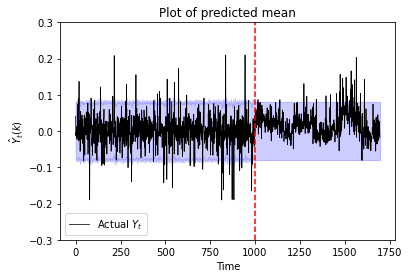

In [116]:
plt.plot(np.concatenate([data, real_y_per_stock], axis=0), color="black", label=r"Actual $Y_t$", linewidth=0.75)
plt.fill_between(range(len(summary)), summary[cols[1]], summary[cols[2]], alpha=0.2, color='blue')
plt.vlines(x=len(pred), ymin=-0.3, ymax=0.3, colors='red', linestyle="dashed")
plt.ylim(-0.3, 0.3)
plt.xlabel('Time')
plt.ylabel(r'$\hat{Y}_t(k)$')
plt.title('Plot of predicted mean')
plt.legend(loc='lower left')
plt.show()
